In [8]:
import tensorflow as tf
from matplotlib import pyplot as plt
from src.Image_processing_functions import load, resize, random_crop, normalize, random_jitter 
from src.Image_processing_functions import load_image_train, load_image_test
from src.Image_processing_functions import BUFFER_SIZE, BATCH_SIZE, IMG_WIDTH, IMG_HEIGHT

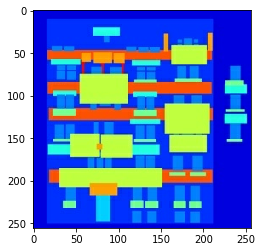

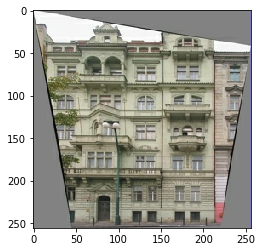

In [9]:
# ejemplo de visualizacíon de las imagenes
# call the load function to returns the input image and the ground through
inp, re = load('images/facades/train/100.jpg')
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)

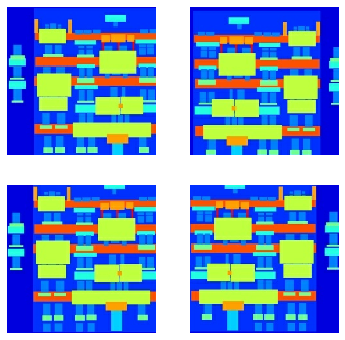

In [10]:
# Call the random_jitter function.This function allow you to:
# 1) resizing the images to 286 x 286 x 3
# 2) randomly cropping to 256 x 256 x 3
# 3) random mirroring
plt.figure(figsize=(6, 6))
for i in range(4):
    rj_inp, rj_re = random_jitter(inp, re)
    plt.subplot(2, 2, i+1)
    plt.imshow(rj_inp/255.0)
    plt.axis('off')
plt.show()

In [11]:
# Call the load_image_train function that automate the whole process of loading test images.
# Input images 512 pixel 256*2
# Separate real image from input image
# Resize las dos imagenes con el metodo de los NEAREST_NEIGHBOR
# Appy a random_jitter
# Finally normalizing the images to [-1, 1]
train_dataset = tf.data.Dataset.list_files('images/facades/train/*.jpg')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [12]:
test_dataset = tf.data.Dataset.list_files('images/facades/train/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
train_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>

In [14]:
test_dataset

<BatchDataset shapes: ((None, 256, 256, None), (None, 256, 256, None)), types: (tf.float32, tf.float32)>

In [ ]:
#https://machinelearningmastery.com/how-to-develop-a-pix2pix-gan-for-image-to-image-translation/

In [ ]:
# https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix accoppiare filtro e foto